# Analisis de Datos del Grupo G
## Universidad de Flores y Universidad de Villa María



In [2]:
#Realizamos los imports necesarios
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors

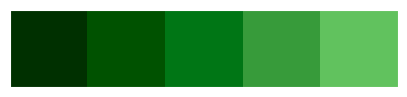

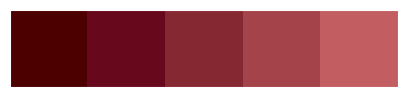

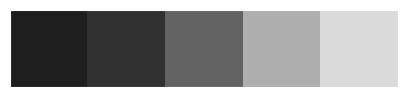

In [3]:
plt.rcParams['figure.dpi'] = 100
#plt.rcParams['figure.figsize'] = (8,12)
sns.set_style('dark')
colors_green = ["#61C25E","#379B3A","#007615","#005200","#003000"][::-1]
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_red = ["#C25E62","#A44349","#862832","#68081C","#4C0000"][::-1]
sns.palplot(colors_green)
sns.palplot(colors_red)
sns.palplot(colors_dark)

In [4]:
#Colocamos el nombre de las universidades en dos variables
#Para una futura reutilización del codigo

university1 = 'GrupoA_flores_universidad'
university1_name = 'Universidad de Flores'

university2 = 'GrupoA_villa_maria_universidad'
university2_name = 'Universidad de Villa María'



In [5]:
df_1 = pd.read_csv(f'../../datasets/{university1}_process.txt', sep='\t')
df_2 = pd.read_csv(f'../../datasets/{university2}_process.txt', sep='\t')

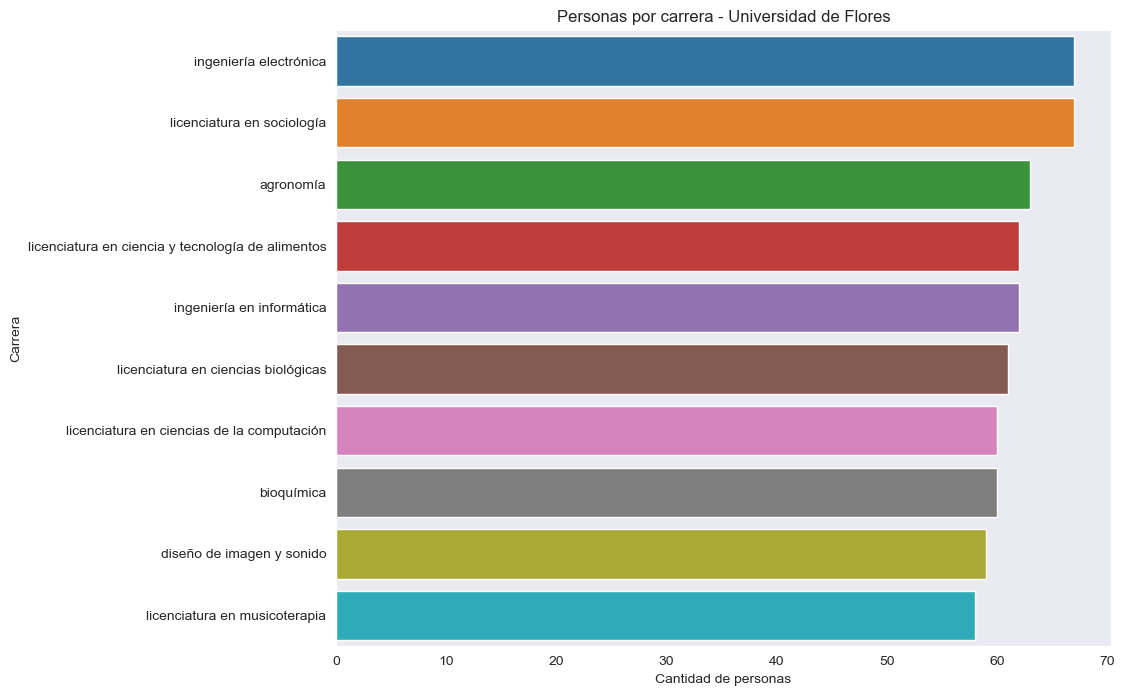

In [6]:
df_aux = df_1.groupby('career').count().reset_index().sort_values('university', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(data=df_aux.head(10), x='university', y='career', palette=sns.diverging_palette(0,20,s=10,l=60).reverse())

plt.title(f'Personas por carrera - {university1_name}')
plt.xlabel('Cantidad de personas')
plt.ylabel('Carrera')

plt.show()

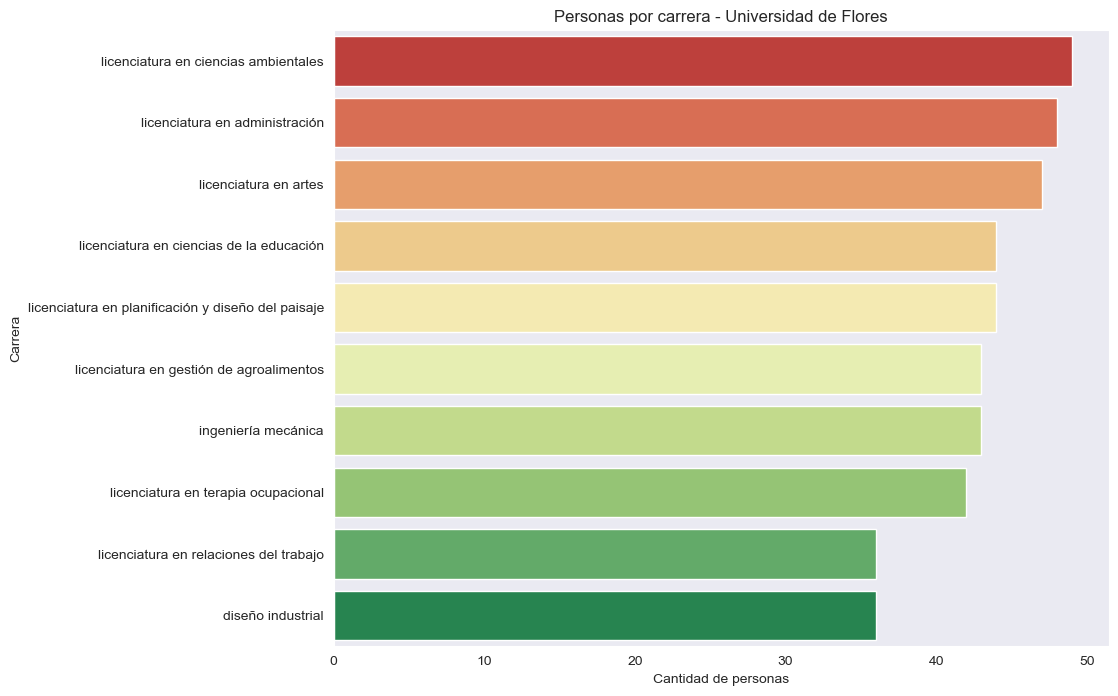

In [7]:
df_aux = df_1.groupby('career').count().reset_index().sort_values('university', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(data=df_aux.tail(10), x='university', y='career', palette='RdYlGn')

plt.title(f'Personas por carrera - {university1_name}')
plt.xlabel('Cantidad de personas')
plt.ylabel('Carrera')

plt.show()

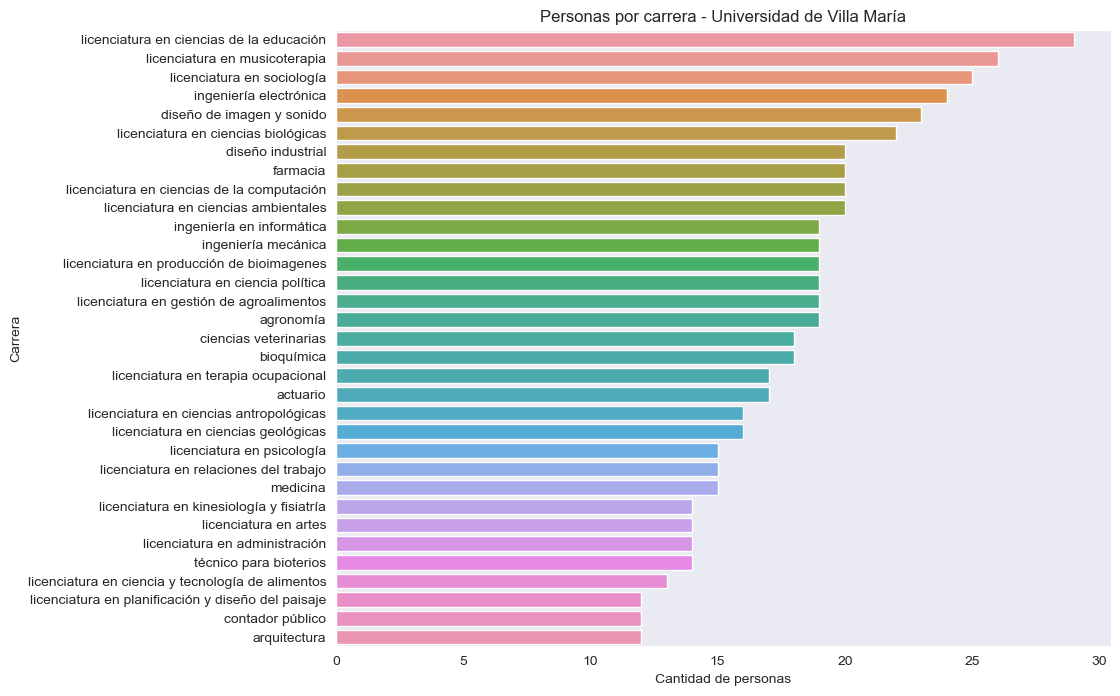

In [8]:
df_aux = df_2.groupby('career').count().reset_index().sort_values('university', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(data=df_aux, x='university', y='career')

plt.title(f'Personas por carrera - {university2_name}')
plt.xlabel('Cantidad de personas')
plt.ylabel('Carrera')

plt.show()

In [9]:
df_1.columns

Index(['university', 'career', 'inscription_date', 'first_name', 'gender',
       'age', 'postal_code', 'location', 'email'],
      dtype='object')

In [10]:
df_1.shape

(1733, 9)

In [11]:
df_1.head()

,university,career,inscription_date,first_name,gender,age,postal_code,location,email
0,universidad de flores,licenciatura en kinesiología y fisiatría,2020-11-01,chelsea taylor,female,21,6200,REALICO,michael67@gmail.com
1,universidad de flores,ingeniería en informática,2020-12-09,daniel brown,male,21,1633,EMPALME,khodges@gmail.com
2,universidad de flores,licenciatura en ciencias biológicas,2020-09-23,john powell,male,54,1633,EMPALME,joshua48@yahoo.com
3,universidad de flores,licenciatura en ciencia y tecnología de alimentos,2020-11-03,rachel wade,female,21,1633,EMPALME,jortiz@hotmail.com
4,universidad de flores,licenciatura en ciencias antropológicas,2020-09-11,amy scott,female,31,5777,ADOLFO RODRIGUEZ SAA,dmadden@hotmail.com


In [12]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1733 entries, 0 to 1732
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   university        1733 non-null   object
 1   career            1733 non-null   object
 2   inscription_date  1733 non-null   object
 3   first_name        1733 non-null   object
 4   gender            1733 non-null   object
 5   age               1733 non-null   int64 
 6   postal_code       1733 non-null   int64 
 7   location          1733 non-null   object
 8   email             1733 non-null   object
dtypes: int64(2), object(7)
memory usage: 122.0+ KB


In [13]:
df_1.describe()

,age,postal_code
count,1733.000000,1733.000000
mean,35.808425,4890.144259
std,19.083208,2220.970797
min,19.000000,1601.000000
25%,21.000000,3027.000000
50%,22.000000,4728.000000
75%,51.000000,6537.000000
max,79.000000,9421.000000


In [14]:
df_2.describe()

,age,postal_code
count,595.000000,595.000000
mean,24.752941,4734.013445
std,7.893726,2076.609956
min,19.000000,1602.000000
25%,21.000000,2848.000000
50%,21.000000,4655.000000
75%,21.000000,6420.000000
max,50.000000,9225.000000


<AxesSubplot:xlabel='gender', ylabel='age'>

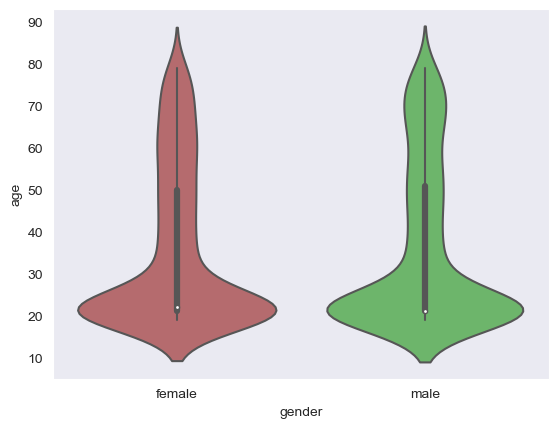

In [15]:
sns.violinplot(data=df_1,y='age', x='gender', palette=[colors_red[4], colors_green[4]])

### top 10 localidades por alumnos

In [16]:
df_1.location.value_counts().head(10)

ALBARRACIN          7
CAMPO GARAY         5
AVELLANEDA          5
EMILIO LAMARCA      5
BAHIA BUSTAMANTE    5
LOS SEMBRADOS       5
COLONIA HANSEN      5
COLONIA JAUREGUI    5
ALTO BLANCO         5
ARROYO QUILLA       5
Name: location, dtype: int64

In [17]:
df_2.location.value_counts().head(10)

ATREUCO       6
ACOSTILLA     5
AGUADA        5
ALBIGASTA     5
BENITEZ       4
CHANILAO      4
HUANQUEROS    4
ANGUIL        4
ATALAYA       4
BAYAUCA       4
Name: location, dtype: int64

### distribucion de alumnos por edad y género

<AxesSubplot:xlabel='age', ylabel='Density'>

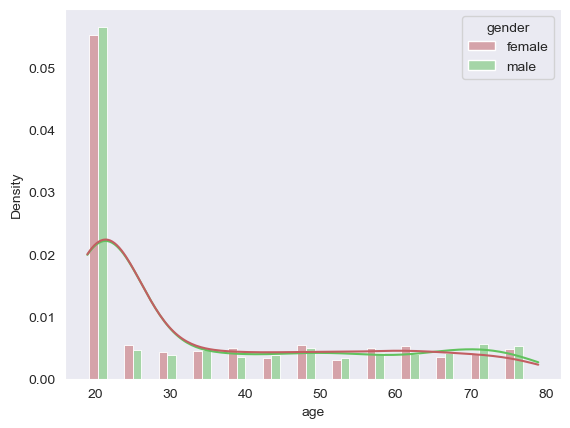

In [18]:
sns.histplot(data=df_1,x='age', hue='gender', kde=True,fill=True,multiple='dodge', shrink=.5,stat='density', palette=[colors_red[4], colors_green[4]])

In [19]:
df_1.inscription_date = pd.to_datetime(df_1.inscription_date)
df_2.inscription_date = pd.to_datetime(df_2.inscription_date)

### inscripciones por mes

<AxesSubplot:xlabel='inscription_date'>

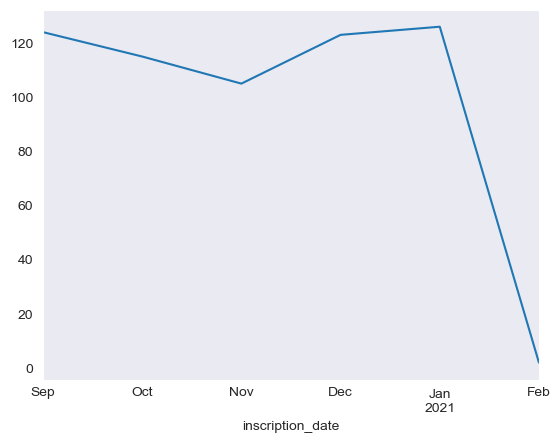

In [20]:
df_2.set_index('inscription_date').groupby([pd.Grouper(freq="M",)]).size().plot()

In [21]:
def clasificador(x):
    
    clasificador ={
    'exactas_nat':['agronomía','bioquímica','ciencias veterinarias','farmacia','licenciatura en ciencias biológicas', 'licenciatura en ciencia y tecnología de alimentos','licenciatura en ciencias ambientales','licenciatura en ciencias biológicas', 'licenciatura en ciencias geológicas', 'licenciatura en gestión de agroalimentos', 'licenciatura en kinesiología y fisiatría', 'licenciatura en planificación y diseño del paisaje','licenciatura en producción de bioimagenes','medicina','técnico para bioterios', 'ingeniería electrónica', 'ingeniería en informática','ingeniería mecánica','licenciatura en ciencias de la computación'],
    'diseño_art':['diseño industrial', 'diseño de imagen y sonido', 'licenciatura en artes', 'licenciatura en musicoterapia'],
    'empresarial':['actuario', 'contador público','licenciatura en administración'],
    'sociales':['licenciatura en ciencias antropológicas','licenciatura en ciencias de la educación','licenciatura en psicología', 'licenciatura en relaciones del trabajo','licenciatura en sociología','licenciatura en terapia ocupacional']
}
    if x in clasificador['exactas_nat']:
        return "Exactas y Naturales"
    elif x in clasificador['diseño_art']:
        return "Artes y Diseño"
    elif x in clasificador['empresarial']:
        return "Ciencias Empresariales"
    else:
        return "Sociales"
df_1['tipo_career'] = df_1.career.apply(clasificador)

### proporción de alumnos por tipo de carrera y género

[Text(0, 0, 'Exactas y Naturales'),
 Text(1, 0, 'Sociales'),
 Text(2, 0, 'Artes y Diseño'),
 Text(3, 0, 'Ciencias Empresariales')]

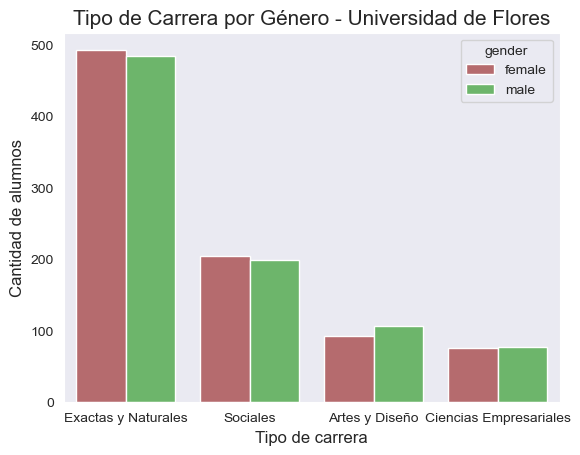

In [22]:
fig,ax = plt.subplots()
g = sns.countplot(data=df_1,x='tipo_career', hue='gender', palette=[colors_red[4], colors_green[4]],ax=ax)

g.set_title(f'Tipo de Carrera por Género - {university1_name}',{'fontsize':15})
g.set_ylabel('Cantidad de alumnos',{'fontsize':12})
g.set_xlabel('Tipo de carrera',{'fontsize':12})
g.set_xticklabels(labels=g.get_xticklabels())
